# Plotting of Optitype's performance on simulated ancient DNA

Note, that some combinations of high coverage / low read length was not possible, and will therefore have an unusually low typing accuracy. 

In [32]:
import os
from os import walk

import pandas as pd
import numpy as np
import sys
import re

import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from matplotlib.pyplot import *

import numpy as np
import seaborn as sns
import json

from collections import Counter

%matplotlib inline

pd.set_option('display.max_rows', 9000)
pd.set_option('display.max_columns', 1500)
pd.set_option('max_colwidth', 400)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))


#Set seaborn color palette:
palette_list = list(sns.color_palette("colorblind"))
#change order
palette_list = [sns.color_palette('colorblind')[3]] + [sns.color_palette('colorblind')[0]] + [sns.color_palette('colorblind')[2]] + [sns.color_palette('colorblind')[1]]

In [33]:

#coverage_list = ['1', '2', '5', '10', '20',]
coverage_list = [1, 2, 5, 10, 20, 50]
coverage_list = [1, 2, 5, 10, 20,]

#read_length_list = ["13", "15", "20", "25", "30", "35", "45", "55", "65"]
read_length_list = ["13", "20", "30", "45", "65"]

resolution = 'two_field'

In [34]:
with open(f"results/results_dict_{resolution}.json", 'r') as infile:
    results_dict = json.load(infile)

In [35]:
idx = pd.IndexSlice

def performance_coverage_plot(results_dict, coverage_list, resolution = 'two_field', alleles=['A', 'B', 'C'], ):


    accuracy_dict = dict()
    call_rate_dict = dict()

    for dmg, read_length_dict in results_dict.items():
        if dmg == 'no_dmg':
            dmg_str = ''
        else:
            dmg_str = '+dmg'

        for rl, coverage_dict in read_length_dict.items():

            accuracy_dict[f'{rl}{dmg_str}'] = dict()
            call_rate_dict[f'{rl}{dmg_str}'] = dict()

            for cov,_ in coverage_dict.items():
                if results_dict[dmg][rl][cov]['HLA-I']['call_rate'] != 0:
                    accuracy_dict[f'{rl}{dmg_str}'][int(cov)] = results_dict[dmg][rl][cov]['HLA-I']['typing_accuracy']
                    call_rate_dict[f'{rl}{dmg_str}'][int(cov)] = results_dict[dmg][rl][cov]['HLA-I']['call_rate']

    accuracy_df = pd.DataFrame(accuracy_dict)
    accuracy_df = accuracy_df[accuracy_df.index.isin(coverage_list)]

    call_rate_df = pd.DataFrame(call_rate_dict)


    fig, axs = plt.subplot_mosaic([['(A)']], constrained_layout=True, figsize=(15,12))
    ax = axs['(A)']
    title = "The impact of read length on Optitype's typing 2-field typing accuracy"
    rl_df = accuracy_df[["13", "25", "45", "65"]]
    rl_df.plot(marker='o', ax=ax, color = palette_list, sharey=True, ms=10)

    dmg_df = accuracy_df[["13+dmg", "25+dmg", "45+dmg", "65+dmg"]]
    dmg_df.plot(marker="^", ax=ax, color = palette_list, sharey=True, ms=10, style='--')

    ax.set_xlabel("Coverage (X)", size=20)
    ax.set_ylabel("Accuracy (%)", size=20)
        
    ax.set_xticks([int(cov) for cov in coverage_list],)
    ax.set_xticklabels(coverage_list, size=20)
    ax.set_yticks(list(range(0,101,10)), size=20)
    ax.yaxis.grid()
    ax.set_title(title)
    
    plt.rcParams.update({'font.size': 20})
    plt.rc('xtick', labelsize=20)
    plt.rc('ytick', labelsize=20)
    
    plt.title("Optitype's typing accuracy for HLA-A, -B and -C in 2-field resolution")
    
    legend = ax.legend(title="Read length")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_ylim(0,100)

    fig.tight_layout()   
    return fig, ax, call_rate_df
    

/tmp/ipykernel_2017069/884284651.py:64: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


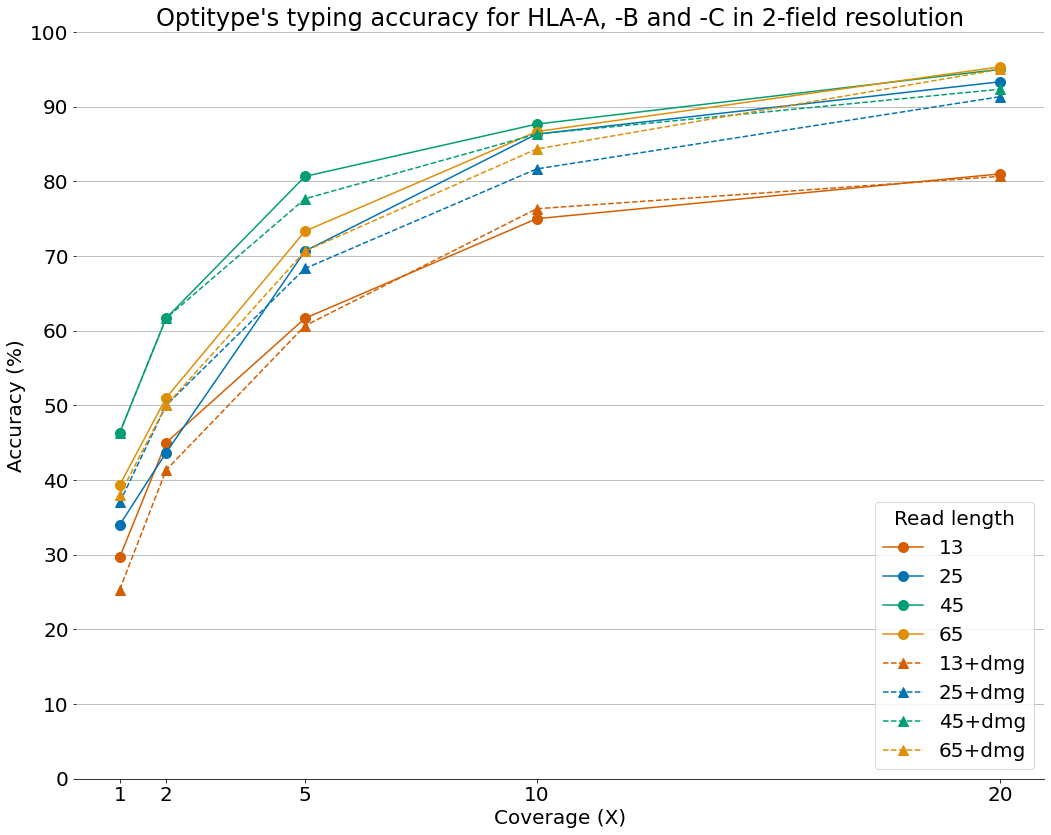

In [36]:
fig, ax, call_rate_df = performance_coverage_plot(results_dict, coverage_list=coverage_list)

fig.savefig('../parsing_and_plotting/plots/read_length_dmg.eps')

In [37]:
call_rate_df

,13+dmg,15+dmg,20+dmg,25+dmg,30+dmg,35+dmg,45+dmg,55+dmg,65+dmg,13,15,20,25,30,35,45,55,65
1,100.0,100.0,100.0,98.666667,98.666667,100.0,98.666667,94.000000,87.333333,100.0,100.0,100.0,99.333333,99.333333,99.333333,98.666667,95.333333,89.333333
2,100.0,100.0,100.0,100.000000,100.000000,100.0,100.000000,99.333333,96.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.000000,99.333333,96.666667
5,100.0,100.0,100.0,100.000000,100.000000,100.0,100.000000,100.000000,99.333333,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,99.333333
10,100.0,100.0,100.0,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
20,100.0,100.0,100.0,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
50,NaN,NaN,28.0,84.000000,96.000000,100.0,100.000000,100.000000,100.000000,NaN,NaN,28.0,84.000000,96.000000,100.000000,100.000000,100.000000,100.000000


In [38]:
idx = pd.IndexSlice

def performance_coverage_plot(results_dict, coverage_list, resolution = 'two_field', alleles=['A', 'B', 'C'], ):


    accuracy_dict = dict()
    call_rate_dict = dict()

    for dmg, read_length_dict in results_dict.items():
        if dmg == 'no_dmg':
            dmg_str = ''
        else:
            dmg_str = '+dmg'

        for rl, coverage_dict in read_length_dict.items():

            accuracy_dict[f'{rl}{dmg_str}'] = dict()
            call_rate_dict[f'{rl}{dmg_str}'] = dict()

            for cov,_ in coverage_dict.items():
                if results_dict[dmg][rl][cov]['HLA-I']['call_rate'] != 0:
                    accuracy_dict[f'{rl}{dmg_str}'][int(cov)] = 100 * results_dict[dmg][rl][cov]['HLA-I']['typing_accuracy'] / results_dict[dmg][rl][cov]['HLA-I']['call_rate']
                    call_rate_dict[f'{rl}{dmg_str}'][int(cov)] = results_dict[dmg][rl][cov]['HLA-I']['call_rate']

    accuracy_df = pd.DataFrame(accuracy_dict)
    accuracy_df = accuracy_df[accuracy_df.index.isin(coverage_list)]

    # call_rate_df = pd.DataFrame(call_rate_dict)
    # call_rate_df = call_rate_df.set_index("coverage", drop=True)
    # call_rate_df["coverage"] = [int(cov) for cov in ['1', '2', '5', '10', '20', '50']]


    fig, axs = plt.subplot_mosaic([['(A)']], constrained_layout=True, figsize=(15,12))
    ax = axs['(A)']
    title = "The impact of read length on Optitype's typing 2-field typing accuracy"
    rl_df = accuracy_df[["13", "25", "45", "65"]]
    rl_df.plot(marker='o', ax=ax, color = palette_list, sharey=True, ms=10)

    dmg_df = accuracy_df[["13+dmg", "25+dmg", "45+dmg", "65+dmg"]]
    dmg_df.plot(marker="^", ax=ax, color = palette_list, sharey=True, ms=10, style='--')

    ax.set_xlabel("Coverage (X)", size=18)
    ax.set_ylabel("Accuracy (%)", size=18)
        
    ax.set_xticks([int(cov) for cov in coverage_list],)
    ax.set_xticklabels(coverage_list, size=18)
    ax.set_yticks(list(range(0,101,10)))
    ax.yaxis.grid()
    ax.set_title(title)
    
    plt.rcParams.update({'font.size': 18})
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    
    plt.title('Correct calls / total calls by Optitype for HLA-A, -B and -C in 2-field resolution')
    
    legend = ax.legend(title="Read length")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_ylim(0,100)

    fig.tight_layout()   
    return fig, ax
    

/tmp/ipykernel_2017069/567177166.py:66: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


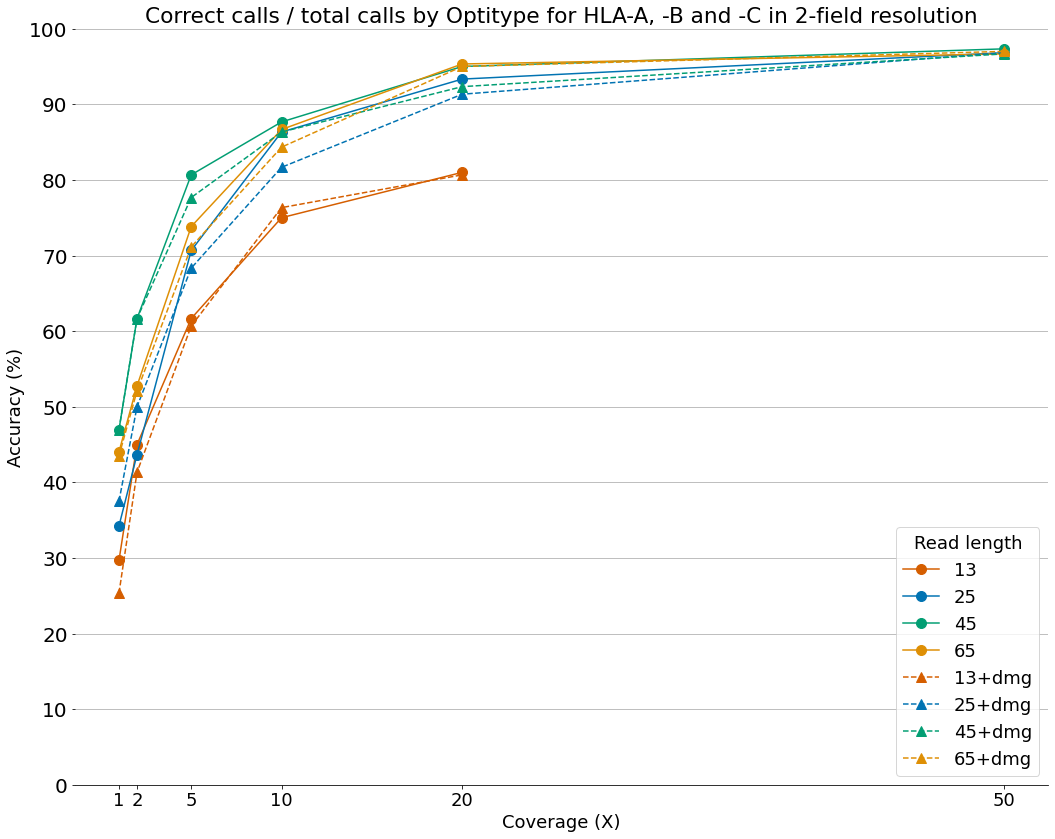

In [39]:
fig, ax = performance_coverage_plot(results_dict, coverage_list=coverage_list+ [50])

fig.savefig('../parsing_and_plotting/plots/read_length_dmg_adjusted_accuracy.eps')

# Notes

In [16]:
idx = pd.IndexSlice

def performance_coverage_plot(results_dict, coverage_list, resolution = 'two_field', alleles=['A', 'B', 'C'], ):


    accuracy_dict = dict()
    call_rate_dict = dict()

    for dmg, read_length_dict in results_dict.items():
        if dmg == 'no_dmg':
            dmg_str = ''
        else:
            dmg_str = '+dmg'

        for rl, coverage_dict in read_length_dict.items():

            accuracy_dict[f'{rl}{dmg_str}'] = dict()
            call_rate_dict[f'{rl}{dmg_str}'] = dict()

            for cov,_ in coverage_dict.items():
                accuracy_dict[f'{rl}{dmg_str}'][int(cov)] = results_dict[dmg][rl][cov]['HLA-I']['typing_accuracy']
                call_rate_dict[f'{rl}{dmg_str}'][int(cov)] = results_dict[dmg][rl][cov]['HLA-I']['call_rate']

                if results_dict[dmg][rl][cov]['HLA-I']['call_rate'] > 0:
                    accuracy_dict[f'{rl}{dmg_str}'][int(cov)] = 100 * results_dict[dmg][rl][cov]['HLA-I']['typing_accuracy'] / results_dict[dmg][rl][cov]['HLA-I']['call_rate']

    accuracy_df = pd.DataFrame(accuracy_dict)
    accuracy_df = accuracy_df[accuracy_df.index.isin(coverage_list)]

    # call_rate_df = pd.DataFrame(call_rate_dict)
    # call_rate_df = call_rate_df.set_index("coverage", drop=True)
    # call_rate_df["coverage"] = [int(cov) for cov in ['1', '2', '5', '10', '20', '50']]


    fig, axs = plt.subplot_mosaic([['(A)', '(B)']], constrained_layout=True, figsize=(20,12))
    figpanels = ['(A)', '(B)']
    for label, ax in axs.items():
        if label == '(A)':
            title = "The impact of read length on Optitype's typing 2-field typing accuracy"
            rl_df = accuracy_df[["13", "20", "30", "45", "65"]]
            rl_df.plot(marker='o', ax=ax, color = palette_list, sharey=True)

        else:
            locus = "The impact of read damage on Optitype's typing 2-field typing accuracy"
            dmg_df = accuracy_df[["13", "13+dmg", "45", "45+dmg"]]
            dmg_df.plot(marker='o', ax=ax, color = palette_list, sharey=True)
    

        ax.set_xlabel("Coverage (X)", size=14)
        ax.set_ylabel("Accuracy (%)", size=14)
            
        ax.set_xticks([int(cov) for cov in coverage_list],)
        ax.set_xticklabels(coverage_list, size=16)
        ax.set_yticks(list(range(0,101,10)))
        ax.yaxis.grid()
        ax.set_title(title)
        
        plt.rcParams.update({'font.size': 14})
        plt.rc('xtick', labelsize=14)
        plt.rc('ytick', labelsize=14)
        
        plt.title('Optitype typing accuracy for HLA-A, -B and -C in 2-field resolution')
        
        legend = ax.legend(title="Read length")

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        #ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

    fig.tight_layout()   
    return fig, ax
    
    performance_coverage_plot(results_dict, coverage_list = coverage_list)